<a href="https://www.kaggle.com/code/victorkituku/loan-status-prediction-learn?scriptVersionId=165567750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import variance,stdev # for doing statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-status-prediction/loan_data.csv


## Importing the dataset

In [2]:
# import dataset
loan = pd.read_csv('/kaggle/input/loan-status-prediction/loan_data.csv')

# view first 5 rows
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
# creating a copy of the dataset
df = loan.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Data sanity checks

In [4]:
# get shape of the dataset
loan.shape

(381, 13)

- The data has 381 rows and 13 columns 

In [5]:
# Checking missing values
loan.isnull().sum()


Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

- The columns with missing values in our dataset include:
> - Gender: 5
> - Dependants: 8
> - Self_Empoloyed: 21
> - Loan_Amount_Term: 11
> - Credit_History: 30

In [6]:
# Checking for duplicate values
loan.duplicated().sum()

0

- Ther are no duplicates in the dataset

In [7]:
# check datatypes of columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


- The dataset has the following datatypes:
> - float: 4 columns
> - Integers: 1 column
> - Object(string): 8 columns

In [8]:
# Descriptive statistics of the numerical columns
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [9]:
# Descriptive statistics of the object columns
loan.describe(include = 'object').T


,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


### Univariate analysis

In [10]:
loan['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

- The property area is divided into 3:
> - SemiUrban: 149
> - Urban: 126
> - Riral: 106

In [11]:
loan['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

- From the loan applicants, 278 are graduates while 103 are not

In [12]:
loan['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

**The Dependent variable**

In [13]:
loan['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

- 271 Loan applications were approved while 110 were denied

## **plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

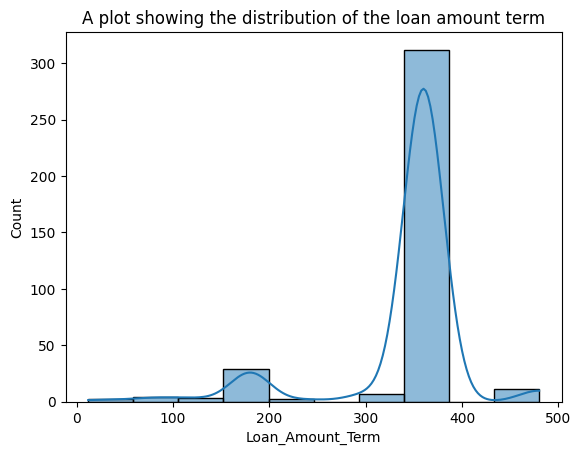

In [14]:
# A histogram 
sns.histplot(data = loan, x = 'Loan_Amount_Term', kde = True)
plt.title('A plot showing the distribution of the loan amount term')

<Axes: xlabel='Loan_Amount_Term'>

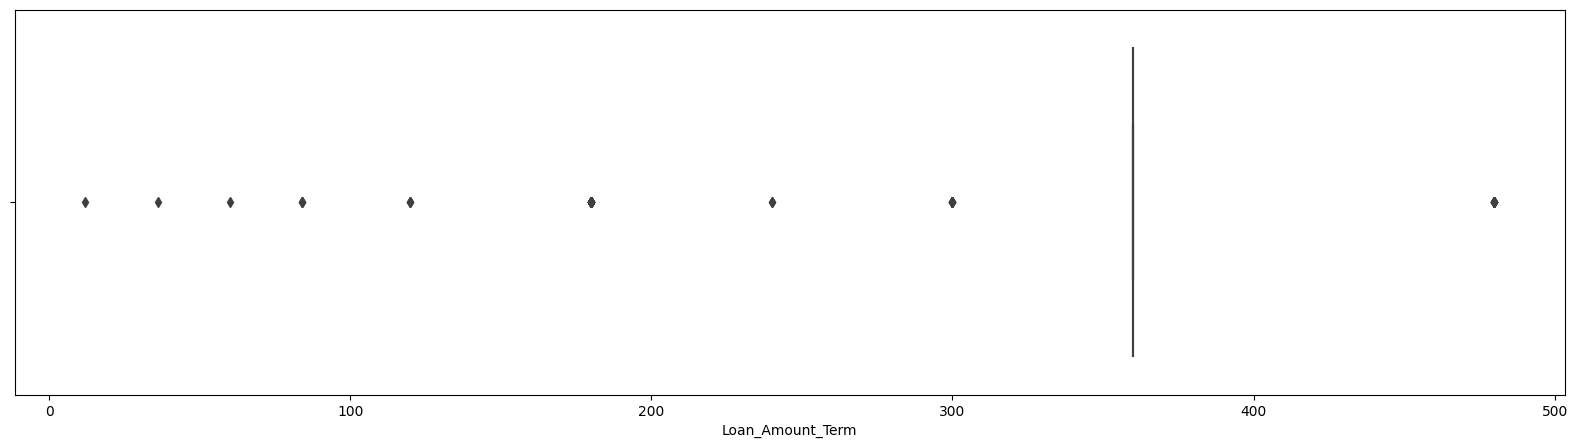

In [15]:
# A boxplot
plt.figure(figsize = (20, 5))
sns.boxplot(data = loan, x = 'Loan_Amount_Term')

In [16]:
# Find the median loan_amount_term
median_loan_amount_term = loan['Loan_Amount_Term'].median()
median_loan_amount_term

360.0

In [17]:
# Find the mean loan_amount_term
mean_loan_amount_term = loan['Loan_Amount_Term'].mean()
mean_loan_amount_term

340.86486486486484

In [18]:
# Finding mode
mode1 = loan['Loan_Amount_Term'].mode()

In [19]:
# Filling the missing values
loan.fillna({'Loan_Amount_Term': median_loan_amount_term}, inplace = True)
loan['Loan_Amount_Term'].isnull().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Plot showing credit History')

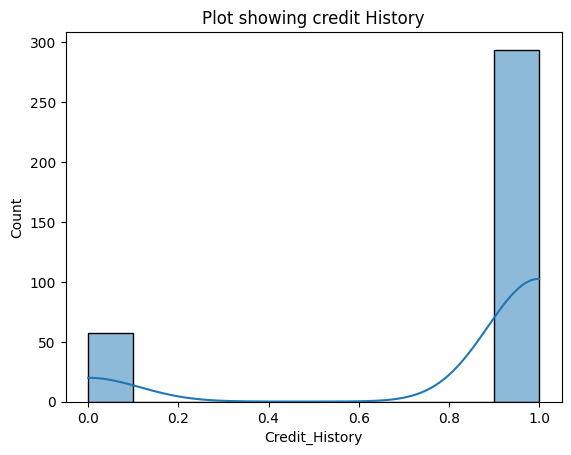

In [20]:
# Histogram of credit history
sns.histplot(data=loan, x = 'Credit_History', kde=True)
plt.title('Plot showing credit History')

In [21]:
median_ch = loan['Credit_History'].median()
median_ch

1.0

In [22]:
mean_ch = loan['Credit_History'].mean()
mean_ch

0.8376068376068376

In [23]:
#Filling the missing values
loan.fillna({'Credit_History': median_ch}, inplace = True)
loan['Credit_History'].isnull().sum()

0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LoanAmount', ylabel='Count'>

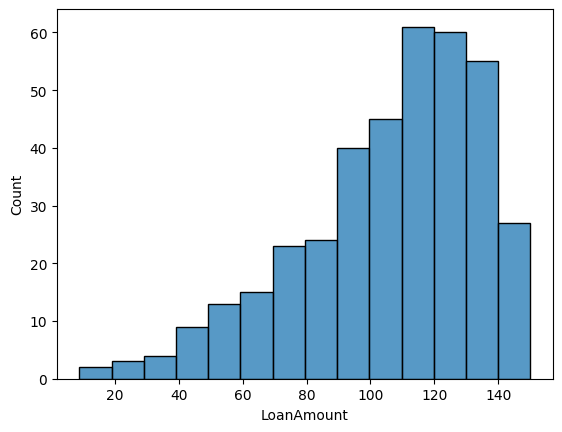

In [24]:
# loan amount histogram
sns.histplot(loan, x = 'LoanAmount')

**Fill missing values for categorical columns**

In [25]:
# fill missing values for Gender using mode
gender_mode = loan['Gender'].mode()[0]
loan.fillna({'Gender': gender_mode}, inplace = True)
loan['Gender'].isnull().sum()


0

In [26]:
# fill missing values for Dependents using mode
dependents_mode = loan['Dependents'].mode()[0]
loan.fillna({'Dependents':dependents_mode}, inplace = True)
loan['Dependents'].isnull().sum()

0

In [27]:
# fill missing values for self_employed using mode
se_mode = loan['Self_Employed'].mode()[0]
loan.fillna({'Self_Employed': se_mode}, inplace = True)
loan['Self_Employed'].isnull().sum()

0

In [28]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Missing values for Numerical and Categorical data handled appropriately

**Plotting graphs for Categorical columns**

Text(0.5, 1.0, 'countplot for gender')

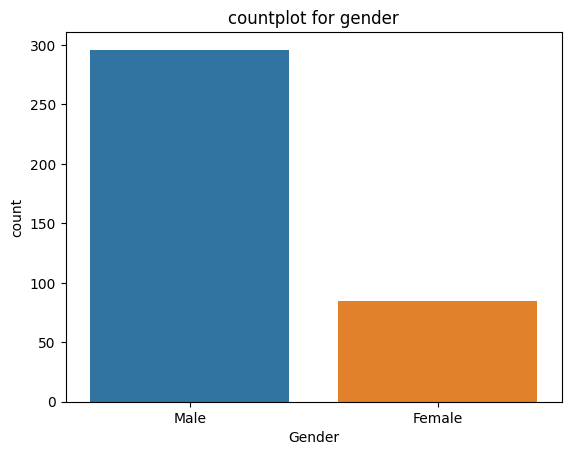

In [29]:
#countplot for gender
sns.countplot(data=loan, x = 'Gender')
plt.title('countplot for gender')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Count'>

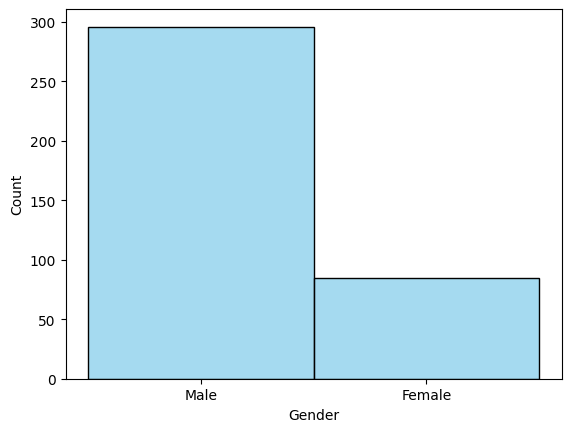

In [30]:
# histplot for gender
sns.histplot(data = loan, x = 'Gender', color = 'skyblue')

Text(0.5, 1.0, 'countplot for Dependents')

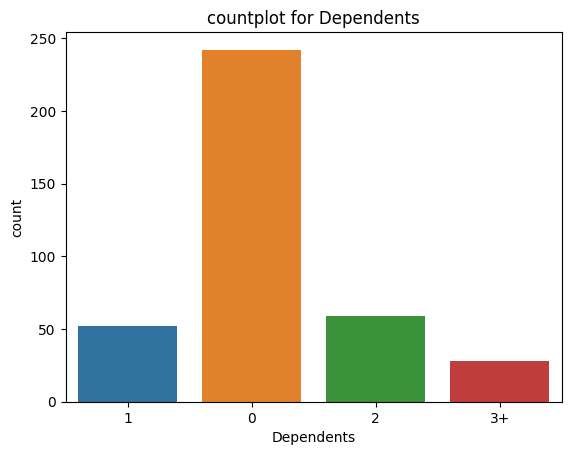

In [31]:
#countplot for Dependents
sns.countplot(data=loan, x = 'Dependents')
plt.title('countplot for Dependents')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'histplot for Dependents')

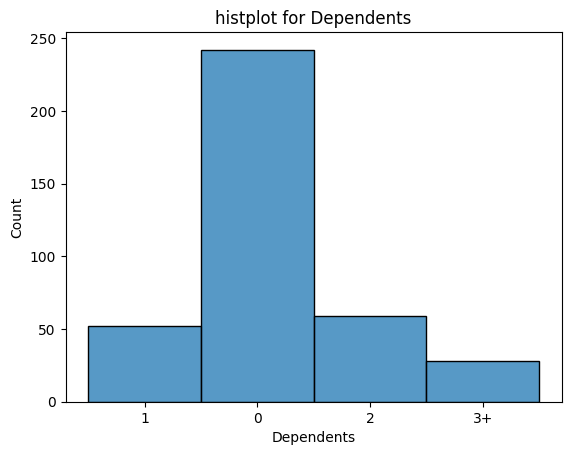

In [32]:
#histplot for Dependents
sns.histplot(data=loan, x = 'Dependents')
plt.title('histplot for Dependents')

In [33]:
#boxplot for gender vs loan status
# loan_map = {'Y':1, 'N':0}
# loan['Loan_Status'] = loan['Loan_Status'].replace({'Y': 1, 'N': 0})
# # loan['Loan_Status'].value_counts()
# sns.boxplot(data = loan, x = 'Loan_Status', y = 'Gender')

<Axes: xlabel='ApplicantIncome'>

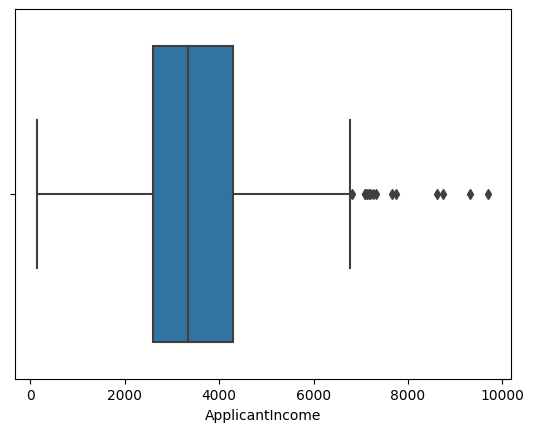

In [34]:
#boxplot for applicant income
sns.boxplot(loan, x = 'ApplicantIncome')

<Axes: xlabel='LoanAmount'>

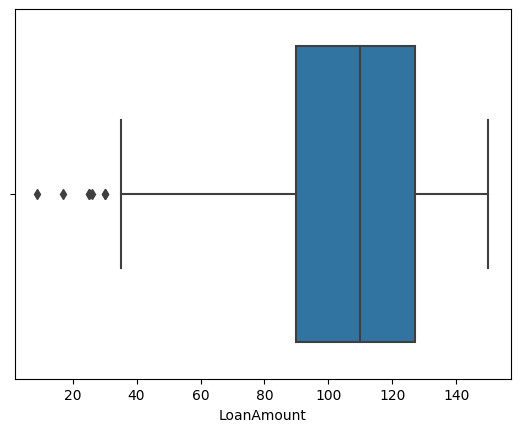

In [35]:
#boxplot for loan amount
sns.boxplot(loan, x = 'LoanAmount')

- How to remove outliers

In [36]:
#Calculate IQR
q1 = loan['LoanAmount'].quantile(0.25)
print(q1)
q3 = loan['LoanAmount'].quantile(0.75)
print(q3)

IQR = q3-q1
print(IQR)

90.0
127.0
37.0


In [37]:
# lower boundary 
lower_boundary = q1 - IQR * 1.5
lower_boundary

34.5

In [38]:
# upper boundary
upper_boundary = q3 + 1.5*IQR
upper_boundary

182.5

In [39]:
# getting the outliers
outliers = loan[(loan['LoanAmount'] < lower_boundary) | (loan ['LoanAmount'] > upper_boundary)]
outliers.shape


(7, 13)

In [40]:
loan_clean = loan[(loan['LoanAmount']>=lower_boundary) & (loan['LoanAmount']<=upper_boundary)]
loan_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [41]:
loan_clean.shape

(374, 13)

<Axes: xlabel='LoanAmount'>

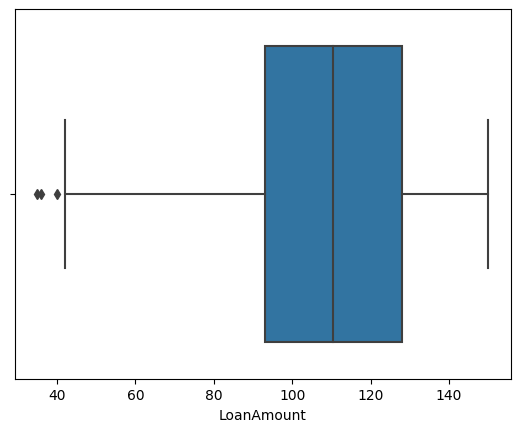

In [42]:
#boxplot for loan amount
sns.boxplot(loan_clean, x = 'LoanAmount')

In [43]:
#Change categorical values to numeric variables
loan_clean.describe(include = 'O').T

,count,unique,top,freq
Loan_ID,374,374,LP001003,1
Gender,374,2,Male,291
Married,374,2,Yes,224
Dependents,374,4,0,238
Education,374,2,Graduate,272
Self_Employed,374,2,No,340
Property_Area,374,3,Semiurban,146
Loan_Status,374,2,Y,265


In [44]:
le = LabelEncoder()
loan_clean['Gender'] = le.fit_transform(loan_clean['Gender'])
loan_clean.head()

/tmp/ipykernel_18/3877212989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['Gender'] = le.fit_transform(loan_clean['Gender'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [45]:
loan_clean['Married'] = le.fit_transform(loan_clean['Married'])
loan_clean.head()

/tmp/ipykernel_18/2790755860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['Married'] = le.fit_transform(loan_clean['Married'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,1,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [46]:
loan_clean['Property_Area'] = le.fit_transform(loan_clean['Property_Area'])
loan_clean['Property_Area']

/tmp/ipykernel_18/3947671812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['Property_Area'] = le.fit_transform(loan_clean['Property_Area'])


0      0
1      2
2      2
3      2
4      2
      ..
376    2
377    0
378    0
379    0
380    1
Name: Property_Area, Length: 374, dtype: int64

In [47]:
loan_clean['Dependents'] = le.fit_transform(loan_clean['Dependents'])
loan_clean['Education'] = le.fit_transform(loan_clean['Education'])
loan_clean['Loan_Status'] = le.fit_transform(loan_clean['Loan_Status'])
loan_clean['Self_Employed'] = le.fit_transform(loan_clean['Self_Employed'])

/tmp/ipykernel_18/2988962985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['Dependents'] = le.fit_transform(loan_clean['Dependents'])
/tmp/ipykernel_18/2988962985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean['Education'] = le.fit_transform(loan_clean['Education'])
/tmp/ipykernel_18/2988962985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [48]:
loan_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [49]:
loan_clean.drop(columns = ['Loan_ID'], inplace = True)

/tmp/ipykernel_18/2995014367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean.drop(columns = ['Loan_ID'], inplace = True)


In [50]:
loan_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [51]:
dummys = pd.get_dummies(loan_clean['Dependents'])
dummys

,0,1,2,3
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
376,False,False,False,True
377,True,False,False,False
378,True,False,False,False
379,False,False,False,True


In [52]:
# separate depended vs independent variables
lloan = loan_clean.copy()
X = lloan.drop(['Loan_Status'], axis = 1)
Y = lloan.pop('Loan_Status')

In [53]:
#Scaling the dataset

scaler = StandardScaler()
scale_data = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scale_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.534063,0.818317,0.334749,-0.612372,-0.316228,0.700039,0.091816,0.818694,0.260936,0.424041,-1.337563
1,0.534063,0.818317,-0.674897,-0.612372,3.162278,-0.416722,-0.548331,-1.544247,0.260936,0.424041,1.227814
2,0.534063,0.818317,-0.674897,1.632993,-0.316228,-0.710904,0.452642,0.513798,0.260936,0.424041,1.227814
3,0.534063,-1.222020,-0.674897,-0.612372,-0.316228,1.699691,-0.548331,1.314149,0.260936,0.424041,1.227814
4,0.534063,0.818317,-0.674897,1.632993,-0.316228,-0.887272,0.095212,-0.439001,0.260936,0.424041,1.227814
